In [ ]:
# loading the dataset from kaggle
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d zalando-research/fashionmnist
! unzip fashionmnist.zip

 71% 49.0M/68.8M [00:00<00:00, 152MB/s]
100% 68.8M/68.8M [00:00<00:00, 161MB/s]
Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.decomposition import PCA
from keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.image import resize
from tensorflow.keras.layers import Input,Concatenate,GlobalMaxPooling2D,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from keras import models
from keras import layers

**Read the data**

In [ ]:
# read the data
df = pd.read_csv("fashion-mnist_train.csv")
df2= pd.read_csv("fashion-mnist_test.csv")


In [ ]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


**data cleaning and preprocessing**

In [ ]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
# check for missing values in training set
df[df.isna()==True].any(axis = 0).sum()

0

In [ ]:
#calculates the number of duplicated rows in training set
df.duplicated().sum()

43

In [ ]:
# drop the duplicates
df.drop_duplicates(inplace=True)

**visualization**

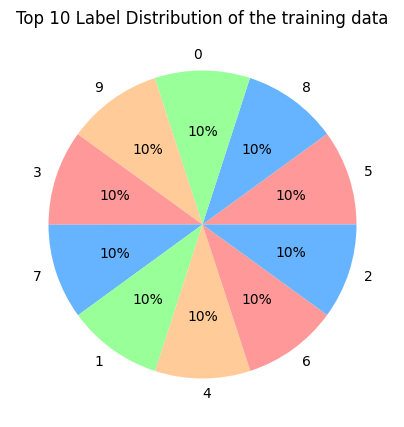

In [ ]:
df_labels = df['label']
df_labels_dis = df_labels.value_counts().sort_values(ascending=False).head(10)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(5, 5))
plt.pie(df_labels_dis, labels=df_labels_dis.index, autopct='%1.0f%%',colors=colors)
plt.title('Top 10 Label Distribution of the training data')
plt.show()


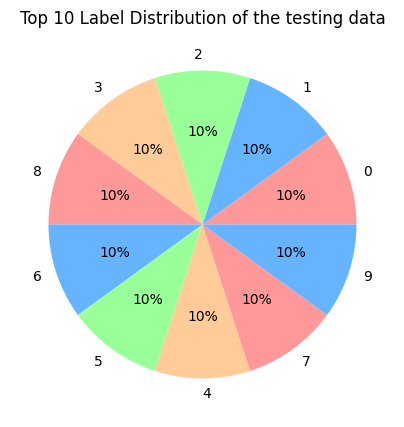

In [ ]:
# check also the distribution of the test data
df_labels = df2['label']
df_labels_dis = df_labels.value_counts().sort_values(ascending=False).head(10)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(5, 5))
plt.pie(df_labels_dis, labels=df_labels_dis.index, autopct='%1.0f%%',colors=colors)
plt.title('Top 10 Label Distribution of the testing data')
plt.show()


as we can see the above graphs both the training and the testing data are balanced so we can use the accuracy as a metric for our classification problem.

# preprocessing step:
we need to normalize the values of the pixels by dividing by 255 to avoid the saturation problems which can cause the vanishing gradient problem.

In [ ]:
# Extracting pixel values and scaling them by dividing by 255 for normalization.
x_train = df.iloc[:, 1:].values / 255
y_train = df.iloc[:, 0].values
x_test = df2.iloc[:, 1:].values / 255
y_test = df2.iloc[:, 0].values

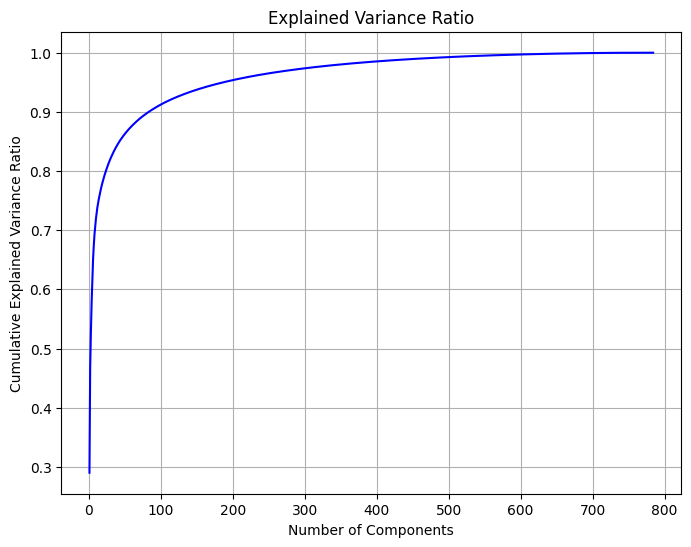

In [ ]:
pca = PCA()

# Fit PCA on the training data
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

num_components = len(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), cumulative_explained_variance, color='b')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

### findings of this step:
before commenting on the graph i have to mention that:
- i haven't used the label in the PCA calculation part.As PCA is an unsupervised learning technique and doesn't directly consider class labels.
- also the passed data to the PCA are normalized by dividing each value by 255.
### comments on the graph:
*X-axis: The x-axis represents the number of principal components used. as we can see, it goes up to 500 because we have a high-dimensional dataset (image pixels).
*Y-axis: The y-axis shows the cumulative explained variance ratio. The values near 1 on the y-axis indicate that the first few principal components capture most of the variance in the data.
Saturation: The graph saturating around 0.9-1.0 on the y-axis is expected. It means that a relatively small number of principal components (likely less than 500 in our case) can explain a significant portion of the data's variance. This is the dimensionality reduction benefit of PCA.



**Draw some of the images**

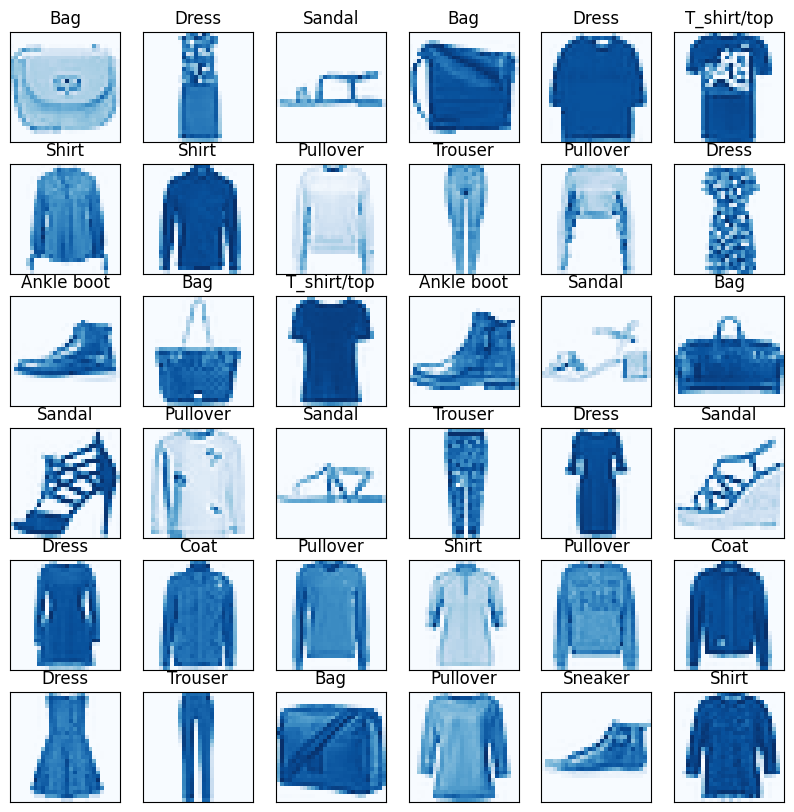

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Randomly select 36 images
indices = np.random.choice(len(x_train), size=36, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx].reshape((28, 28)), cmap='Blues')
    label_index = int(y_train[idx])
    plt.title(class_names[label_index])
plt.show()

**Label Encoding**

label encoding is unnecessary because the labels are already encoded. Instead, i'll use one-hot encoding to ensure that the output of the neural network matches the required format.

In [ ]:
# one hot encoding the train data
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

# Trying the Fully connected neural network:

In [ ]:
model = Sequential()


# Add hidden layers with Batch Normalization and Dropout

model.add(Dense(units=128, activation='relu',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer with softmax activation
model.add(Dense(10, activation='softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20
batch_size = 32
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)

Epoch 1/20
1499/1499 - 13s - loss: 0.6070 - accuracy: 0.7848 - val_loss: 0.4714 - val_accuracy: 0.8336 - 13s/epoch - 8ms/step
Epoch 2/20
1499/1499 - 7s - loss: 0.4817 - accuracy: 0.8284 - val_loss: 0.4240 - val_accuracy: 0.8486 - 7s/epoch - 4ms/step
Epoch 3/20
1499/1499 - 8s - loss: 0.4544 - accuracy: 0.8388 - val_loss: 0.4125 - val_accuracy: 0.8508 - 8s/epoch - 5ms/step
Epoch 4/20
1499/1499 - 7s - loss: 0.4339 - accuracy: 0.8448 - val_loss: 0.4196 - val_accuracy: 0.8530 - 7s/epoch - 5ms/step
Epoch 5/20
1499/1499 - 7s - loss: 0.4128 - accuracy: 0.8512 - val_loss: 0.3725 - val_accuracy: 0.8638 - 7s/epoch - 5ms/step
Epoch 6/20
1499/1499 - 8s - loss: 0.4083 - accuracy: 0.8541 - val_loss: 0.3667 - val_accuracy: 0.8690 - 8s/epoch - 5ms/step
Epoch 7/20
1499/1499 - 7s - loss: 0.3999 - accuracy: 0.8563 - val_loss: 0.3923 - val_accuracy: 0.8566 - 7s/epoch - 5ms/step
Epoch 8/20
1499/1499 - 8s - loss: 0.3990 - accuracy: 0.8552 - val_loss: 0.4065 - val_accuracy: 0.8478 - 8s/epoch - 5ms/step
Epoch 

In [ ]:
def results_virt(history):
    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


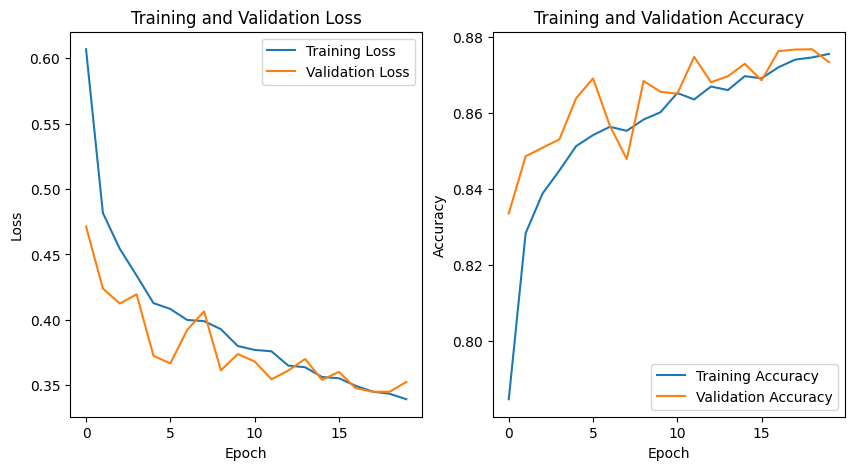

In [ ]:
results_virt(history)

In [ ]:
print("Evaluate Fullly connected neural network Model")
model.evaluate(x_test,y_test)

Evaluate Fullly connected neural network Model
313/313 [==============================] - 2s 5ms/step - loss: 0.3400 - accuracy: 0.8726


[0.34000831842422485, 0.8726000189781189]

In [ ]:
def predict_and_report(model, x_train, y_train, x_test, y_test, class_names):

  # Predict on train and test data
  train_predictions = model.predict(x_train)
  test_predictions = model.predict(x_test)

  # Get predicted class labels (argmax for categorical models)
  train_labels = train_predictions.argmax(axis=1)
  test_labels = test_predictions.argmax(axis=1)

  # Print classification reports
  print("**Train Classification Report**")
  print(classification_report(y_train.argmax(axis=1), train_labels, target_names=class_names))

  print("\n**Test Classification Report**")
  print(classification_report(y_test.argmax(axis=1), test_labels, target_names=class_names))


  train_cm = confusion_matrix(y_train.argmax(axis=1), train_predictions.argmax(axis=1))
  test_cm = confusion_matrix(y_test.argmax(axis=1), test_predictions.argmax(axis=1))

  # Visualize confusion matrices using seaborn heatmaps
  plt.figure(figsize=(12, 6))

  # Train confusion matrix
  plt.subplot(1, 2, 1)
  sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
  plt.title("Train Confusion Matrix")
  plt.tight_layout()

  # Test confusion matrix
  plt.subplot(1, 2, 2)
  sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
  plt.title("Test Confusion Matrix")
  plt.tight_layout()

  plt.show()

313/313 [==============================] - 1s 3ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.85      0.82      0.84      5998
     Trouser       0.99      0.98      0.98      5996
    Pullover       0.87      0.75      0.80      5988
       Dress       0.92      0.89      0.91      5997
        Coat       0.77      0.86      0.81      5995
      Sandal       0.97      0.98      0.97      6000
       Shirt       0.70      0.76      0.73      5989
     Sneaker       0.93      0.97      0.95      5996
         Bag       0.98      0.98      0.98      6000
  Ankle boot       0.99      0.93      0.95      5998

    accuracy                           0.89     59957
   macro avg       0.90      0.89      0.89     59957
weighted avg       0.90      0.89      0.89     59957


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.82      0.79      0.80      1000
     Trouser 

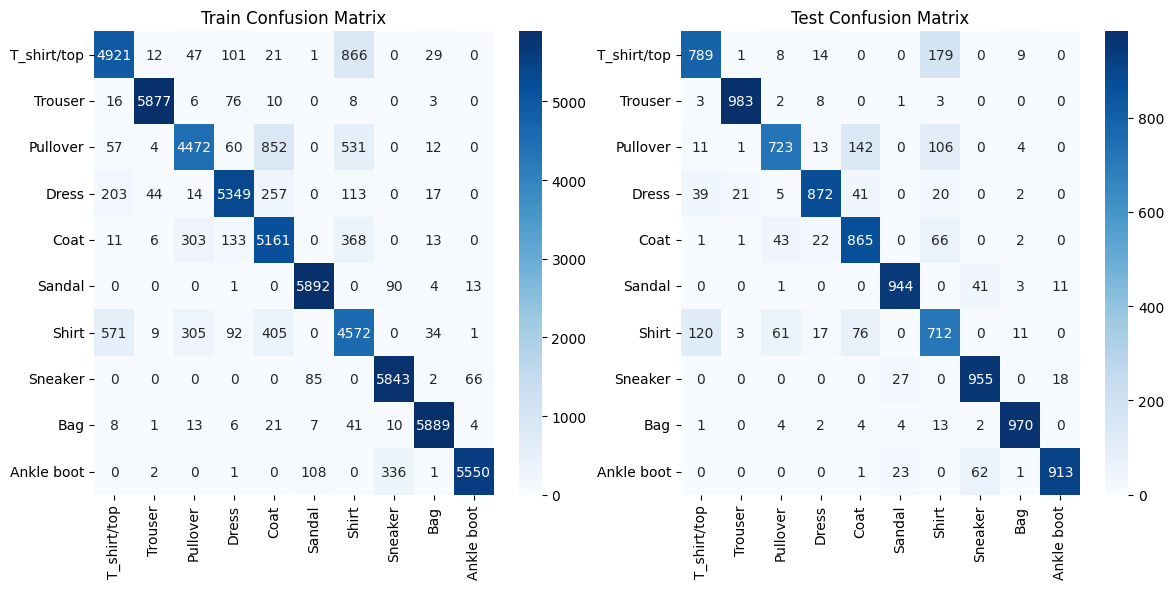

In [ ]:
predict_and_report(model, x_train, y_train, x_test, y_test, class_names)

# comment on the Fully connected neural network:
After training the model on the Fashion mnist dataset,the evaluation steps give about 89 % accuracy on the training data and about 87 % accuracy on the test data.<br>
from the confusion matrix we can see that the model couldn't catch the pattern which can differentiate between the T_shirt/top and the Shirt as the number of mis classification for those two classes is really high compared to the other combinations.<br>
in the next trails i will try to implement LeNet 5 model and compare it results with the results which i get from the FCNN.

 **trail 1:LeNet 5 Model**

Implementing the LeNet-5 Model without cross validation.
i will do so by following the representation given by the doctor from this source: https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/#:~:text=End%20Notes-,What%20is%20Lenet5%3F,handwritten%20and%20machine%2Dprinted%20characters.

as we can see the Lenet-5 Architecture consists of three convolution layers followed by two Dense layer and the Activation used is Tanh.
also the input shape of the image is 32*32 which means we need also a preproccesing step.

In [ ]:
def Original_LeNet_5():
  input_shape=(32, 32, 1)
  model = Sequential()

  # Convolutional layer 1
  model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Convolutional layer 2
  model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Convolutional layer 3
  model.add(Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'))
  # Flatten layer
  model.add(Flatten())

  # Fully connected layer 1
  model.add(Dense(units=84, activation='tanh'))

  # Fully connected layer 2
  model.add(Dense(units=10, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model


In [ ]:
orginial_lenet= Original_LeNet_5()
orginial_lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

as we can see the the summary is equivalent to the resource given by the doctor. <br>
![lenet architecture] https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-18-12-56-51.png

In [ ]:
# resizing the images to be in the shape mentioned in the link
x_train_resized = resize(x_train.reshape(-1, 28, 28, 1), (32, 32))
x_test_resized = resize(x_test.reshape(-1, 28, 28, 1), (32, 32))

In [ ]:
# Fit the model with 20 epochs and using 20% validation set
history = orginial_lenet.fit(x_train_resized, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)



Epoch 1/20
1499/1499 [==============================] - 13s 7ms/step - loss: 0.5031 - accuracy: 0.8162 - val_loss: 0.3689 - val_accuracy: 0.8659
Epoch 2/20
1499/1499 [==============================] - 8s 5ms/step - loss: 0.3493 - accuracy: 0.8728 - val_loss: 0.3366 - val_accuracy: 0.8833
Epoch 3/20
1499/1499 [==============================] - 7s 4ms/step - loss: 0.3075 - accuracy: 0.8859 - val_loss: 0.3172 - val_accuracy: 0.8837
Epoch 4/20
1499/1499 [==============================] - 7s 5ms/step - loss: 0.2797 - accuracy: 0.8973 - val_loss: 0.3121 - val_accuracy: 0.8918
Epoch 5/20
1499/1499 [==============================] - 7s 5ms/step - loss: 0.2573 - accuracy: 0.9056 - val_loss: 0.3049 - val_accuracy: 0.8912
Epoch 6/20
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2392 - accuracy: 0.9108 - val_loss: 0.2879 - val_accuracy: 0.8974
Epoch 7/20
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2206 - accuracy: 0.9189 - val_loss: 0.2942 - val_accuracy

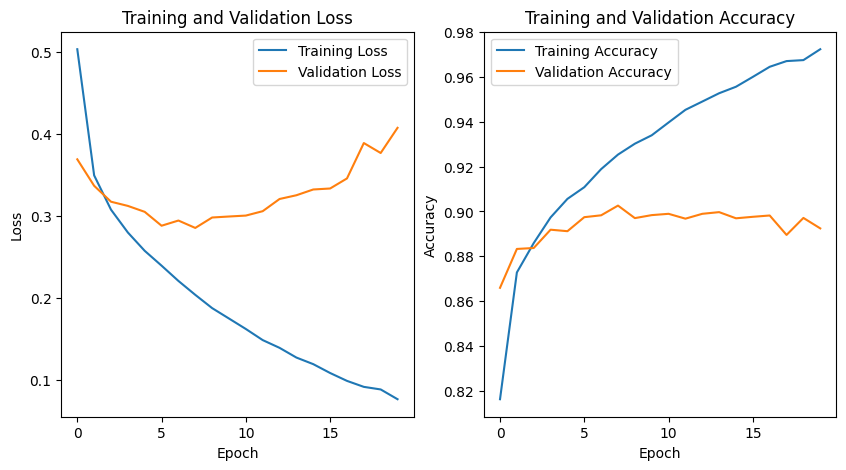

In [ ]:
results_virt(history)

In [ ]:
print("Evaluate LeNet  Model")
orginial_lenet.evaluate(x_test_resized,y_test)

Evaluate LeNet  Model
313/313 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.8956


[0.3772267699241638, 0.8956000208854675]

313/313 [==============================] - 1s 2ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.88      0.97      0.92      5998
     Trouser       1.00      0.99      0.99      5996
    Pullover       0.91      0.95      0.93      5988
       Dress       0.98      0.93      0.95      5997
        Coat       0.94      0.91      0.92      5995
      Sandal       0.99      0.99      0.99      6000
       Shirt       0.92      0.85      0.88      5989
     Sneaker       0.96      0.99      0.98      5996
         Bag       0.99      0.99      0.99      6000
  Ankle boot       1.00      0.96      0.98      5998

    accuracy                           0.95     59957
   macro avg       0.95      0.95      0.95     59957
weighted avg       0.95      0.95      0.95     59957


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.78      0.91      0.84      1000
     Trouser 

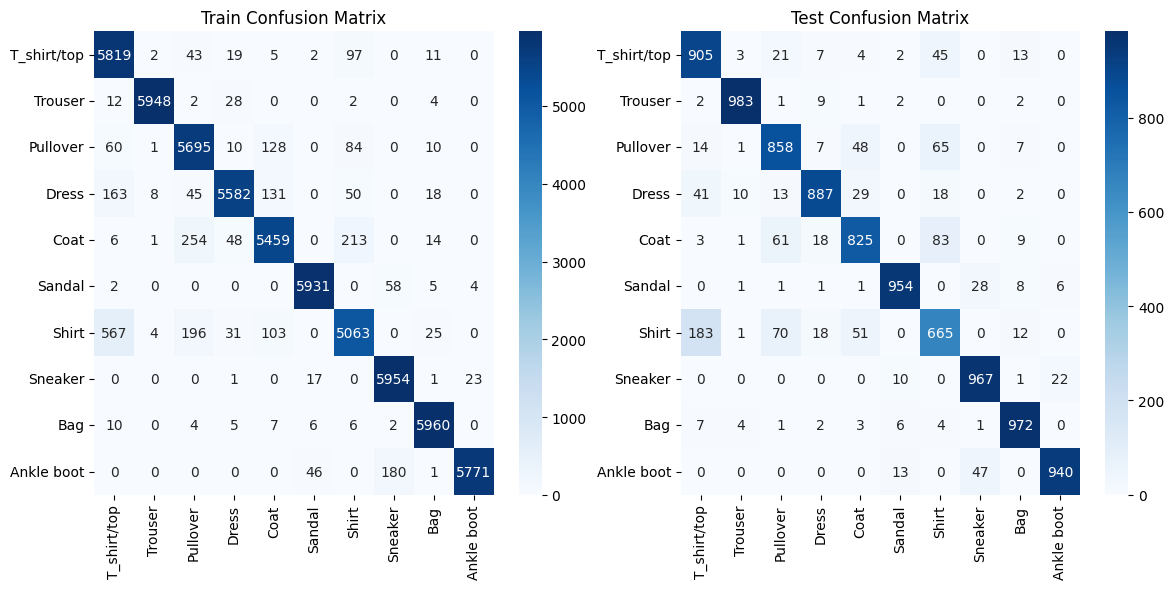

In [ ]:
predict_and_report(orginial_lenet, x_train_resized, y_train, x_test_resized, y_test, class_names)

as we can see here the model is making many mistakes in the Shirt class and most of the predictions errors where by predicting the Shirt as T_shirt/top which makes sense as the images are very small and in gray scale.<br>
comparing to the Fully connected neural network the LeNet could differentiate between T_shirt /top better than the Fully connected neural network as number of T_shirt/top predicted as Shirt dropped from 179 to 45 and the number of shirts perdicted as T_shirt/top increased from 120 to 183 in the test data.<br>
the overall accuracy increased from about 87% on the test data using the FCNN model to about 89.5% using the original Lenet 5 model.

 ##  trail 2
 we need to train our model with different hyperparameters to  enhance our model's performance.<br>
 in this trail i will use the batch normalization and dropout to test if they enhance the model performance.also i will implememnt a function which accept the dropout ratio and the number of kernals and number of nodes in network.
 in this trail i will use the following :<br>
 num_kernels_1=6,<br>
 num_kernels_2=16,<br>
 num_kernels_3=120,<br>
 num_nodes1=84,<br>
 drop_ratio=0.25,<br>
 batch_norm=True.<br>
 the difference from the original lenet that i have used relu as activation function instead of the tanh and also i have used both the batch norm and the dropout techniques to avoid the overfitting that we have seen in the previous trail.

In [ ]:
def Enhanced_LeNet_5(num_kernels_1=6, num_kernels_2=16, num_kernels_3=120,num_nodes1=84,drop_ratio=0.25,batch_norm=True):


  input_shape = (32, 32, 1)  # Assuming grayscale images

  # Sequential model
  model = Sequential()

  # Convolutional layer 1 with ReLU, BatchNorm, and Dropout
  model.add(Conv2D(filters=num_kernels_1, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
  if batch_norm==True:
    model.add(BatchNormalization())
  model.add(Dropout(drop_ratio))  # Adjust dropout rate as needed
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Convolutional layer 2 with ReLU, BatchNorm, and Dropout
  model.add(Conv2D(filters=num_kernels_2, kernel_size=(5, 5), activation='relu'))
  if batch_norm==True:
    model.add(BatchNormalization())
  model.add(Dropout(drop_ratio))  # Adjust dropout rate as needed
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Convolutional layer 3 with ReLU, BatchNorm, and Dropout
  model.add(Conv2D(filters=num_kernels_3, kernel_size=(5, 5), activation='relu'))
  if batch_norm==True:
    model.add(BatchNormalization())
  model.add(Dropout(drop_ratio))  # Adjust dropout rate as needed

  # Flatten layer
  model.add(Flatten())

  # Fully connected layer 1 with ReLU and Dropout
  model.add(Dense(units=num_nodes1, activation='relu'))
  model.add(Dropout(drop_ratio))  # Adjust dropout rate as needed

  # Fully connected layer 2 with softmax
  model.add(Dense(units=10, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
model=Enhanced_LeNet_5(num_kernels_1=6, num_kernels_2=16, num_kernels_3=120,num_nodes1=84,drop_ratio=0.25,batch_norm=True)
history = model.fit(x_train_resized, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/20
1499/1499 [==============================] - 14s 6ms/step - loss: 0.5764 - accuracy: 0.7901 - val_loss: 0.4735 - val_accuracy: 0.8125
Epoch 2/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.4172 - accuracy: 0.8482 - val_loss: 0.3707 - val_accuracy: 0.8559
Epoch 3/20
1499/1499 [==============================] - 10s 6ms/step - loss: 0.3766 - accuracy: 0.8614 - val_loss: 0.3104 - val_accuracy: 0.8858
Epoch 4/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3583 - accuracy: 0.8719 - val_loss: 0.3081 - val_accuracy: 0.8870
Epoch 5/20
1499/1499 [==============================] - 12s 8ms/step - loss: 0.3383 - accuracy: 0.8758 - val_loss: 0.3042 - val_accuracy: 0.8913
Epoch 6/20
1499/1499 [==============================] - 13s 9ms/step - loss: 0.3280 - accuracy: 0.8791 - val_loss: 0.2944 - val_accuracy: 0.8933
Epoch 7/20
1499/1499 [==============================] - 13s 8ms/step - loss: 0.3170 - accuracy: 0.8824 - val_loss: 0.3421 - val_accu

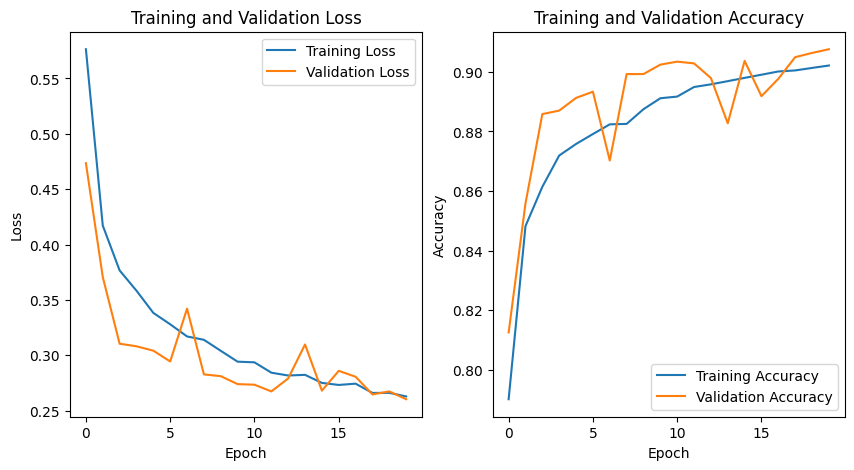

In [ ]:
results_virt(history)

In [ ]:
print("Evaluate Enhanced LeNet  Model")
model.evaluate(x_test_resized,y_test)

Evaluate Enhanced LeNet  Model
313/313 [==============================] - 1s 4ms/step - loss: 0.2457 - accuracy: 0.9100


[0.24567143619060516, 0.9100000262260437]

313/313 [==============================] - 1s 3ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.89      0.87      0.88      5998
     Trouser       0.99      0.99      0.99      5996
    Pullover       0.83      0.92      0.87      5988
       Dress       0.92      0.93      0.93      5997
        Coat       0.90      0.81      0.86      5995
      Sandal       0.99      0.98      0.99      6000
       Shirt       0.77      0.77      0.77      5989
     Sneaker       0.96      0.98      0.97      5996
         Bag       0.99      0.98      0.99      6000
  Ankle boot       0.98      0.97      0.97      5998

    accuracy                           0.92     59957
   macro avg       0.92      0.92      0.92     59957
weighted avg       0.92      0.92      0.92     59957


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.87      0.85      0.86      1000
     Trouser 

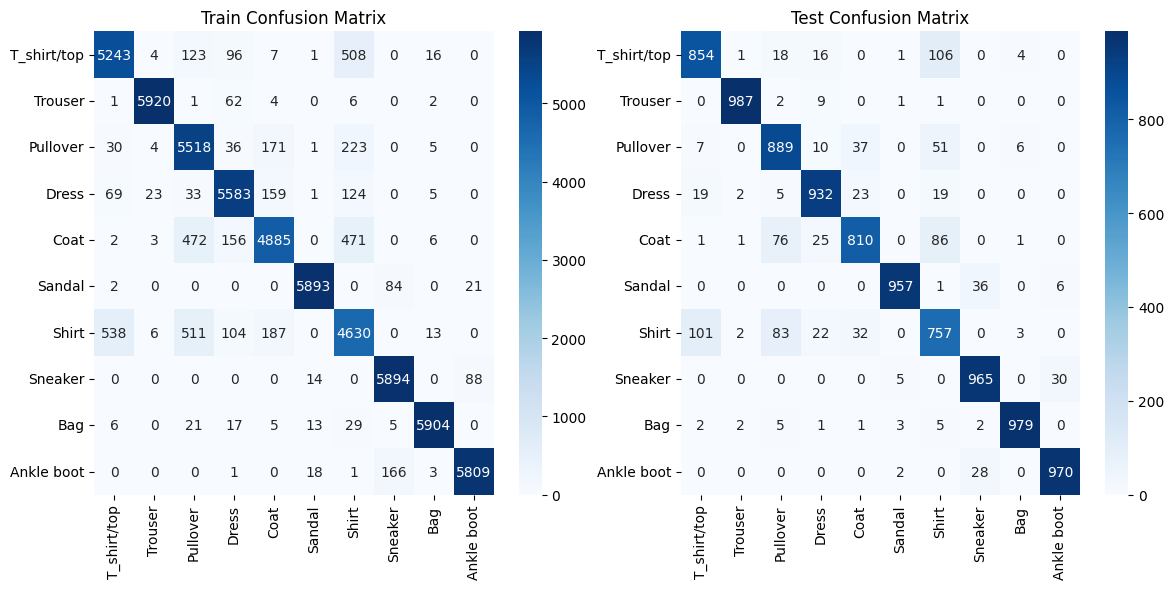

In [ ]:
predict_and_report(model, x_train_resized, y_train, x_test_resized, y_test, class_names)

## comment on this trail:
as we can see the deviation between the accuracy curves of both the training and validation set in the plots of first trail is not found here in the plot of the second trail as both the training and validation accuracies were near to each other and about 90%.this is due to the effect of using both batch normalization and dropout.<br>
we can also see that the problem of the shirt being predicted as T/shirt still persists so in the next trail i will try to increase the model capacity by increasing the number of kernals in the convolution layer if the problem still persist i will perform another trial in which i will increase also the number of nodes in the Fully connected layer.

## trail 3:
in this trial
i will double the number of kernals in each convolution layer
num_kernels_1=12, <br>
num_kernels_2=32, <br>
num_kernels_3=240,<br>
num_nodes1=84,<br>
drop_ratio=0.25,<br>
batch_norm=True<br>

In [ ]:
model=Enhanced_LeNet_5(num_kernels_1=12, num_kernels_2=32, num_kernels_3=240,num_nodes1=84,drop_ratio=0.25,batch_norm=True)
history = model.fit(x_train_resized, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/20
1499/1499 [==============================] - 12s 6ms/step - loss: 0.5230 - accuracy: 0.8132 - val_loss: 0.3926 - val_accuracy: 0.8540
Epoch 2/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3774 - accuracy: 0.8607 - val_loss: 0.3467 - val_accuracy: 0.8687
Epoch 3/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3404 - accuracy: 0.8748 - val_loss: 0.3488 - val_accuracy: 0.8756
Epoch 4/20
1499/1499 [==============================] - 10s 7ms/step - loss: 0.3221 - accuracy: 0.8807 - val_loss: 0.3169 - val_accuracy: 0.8852
Epoch 5/20
1499/1499 [==============================] - 10s 7ms/step - loss: 0.2995 - accuracy: 0.8902 - val_loss: 0.4694 - val_accuracy: 0.8180
Epoch 6/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2897 - accuracy: 0.8951 - val_loss: 0.2786 - val_accuracy: 0.8994
Epoch 7/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2752 - accuracy: 0.8985 - val_loss: 0.2807 - val_accura

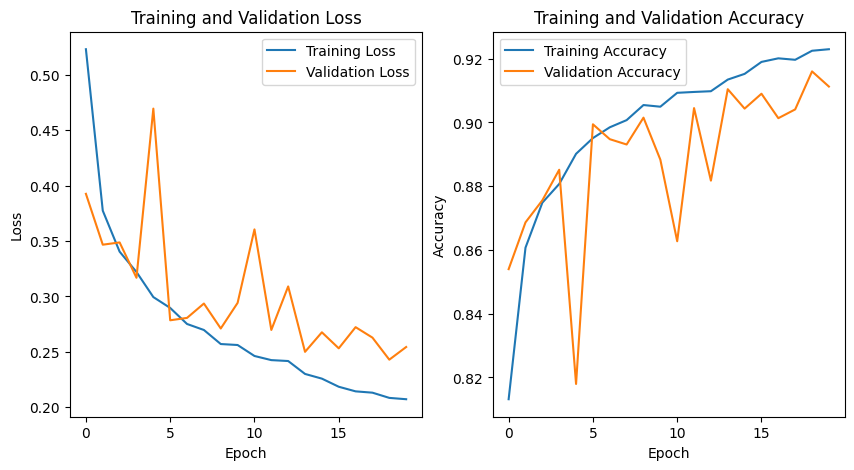

In [ ]:
results_virt(history)

In [ ]:
print("Evaluate Trail 3  Model")
model.evaluate(x_test_resized,y_test)

Evaluate Trail 3  Model
313/313 [==============================] - 2s 5ms/step - loss: 0.2355 - accuracy: 0.9158


[0.23549748957157135, 0.9157999753952026]

313/313 [==============================] - 1s 2ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.88      0.92      0.90      5998
     Trouser       0.99      0.99      0.99      5996
    Pullover       0.80      0.95      0.87      5988
       Dress       0.93      0.96      0.94      5997
        Coat       0.93      0.78      0.85      5995
      Sandal       1.00      0.99      0.99      6000
       Shirt       0.86      0.75      0.80      5989
     Sneaker       0.97      0.98      0.98      5996
         Bag       0.99      0.99      0.99      6000
  Ankle boot       0.98      0.98      0.98      5998

    accuracy                           0.93     59957
   macro avg       0.93      0.93      0.93     59957
weighted avg       0.93      0.93      0.93     59957


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.86      0.88      0.87      1000
     Trouser 

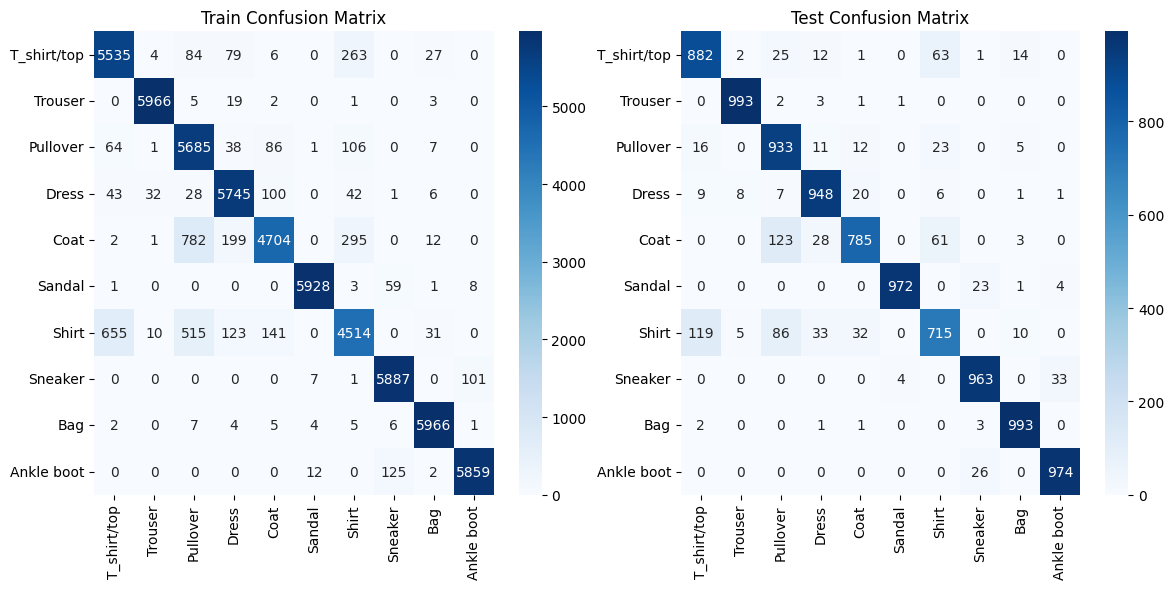

In [ ]:
predict_and_report(model, x_train_resized, y_train, x_test_resized, y_test, class_names)

- the accurcies slightly enhanced to be about 92 % in both the training and the vlaidation and about 91.5% in the validation.

## trail 4
i will try to increase also the number of nodes in the fully connected layer and see the effect of that.
num_kernels_1=32, num_kernels_2=64, num_kernels_3=128,num_nodes1=256,drop_ratio=0.25,batch_norm=True
also increase the number of epochs to 50

In [ ]:
model=Enhanced_LeNet_5(num_kernels_1=32, num_kernels_2=64, num_kernels_3=128,num_nodes1=256,drop_ratio=0.3,batch_norm=True)
history = model.fit(x_train_resized, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/30
1687/1687 [==============================] - 13s 6ms/step - loss: 0.5004 - accuracy: 0.8203 - val_loss: 0.4929 - val_accuracy: 0.8294
Epoch 2/30
1687/1687 [==============================] - 10s 6ms/step - loss: 0.3539 - accuracy: 0.8726 - val_loss: 0.3682 - val_accuracy: 0.8666
Epoch 3/30
1687/1687 [==============================] - 10s 6ms/step - loss: 0.3210 - accuracy: 0.8832 - val_loss: 0.5166 - val_accuracy: 0.8010
Epoch 4/30
1687/1687 [==============================] - 10s 6ms/step - loss: 0.2934 - accuracy: 0.8938 - val_loss: 0.3848 - val_accuracy: 0.8661
Epoch 5/30
1687/1687 [==============================] - 10s 6ms/step - loss: 0.2740 - accuracy: 0.8996 - val_loss: 0.3555 - val_accuracy: 0.8706
Epoch 6/30
1687/1687 [==============================] - 10s 6ms/step - loss: 0.2616 - accuracy: 0.9045 - val_loss: 0.2775 - val_accuracy: 0.8964
Epoch 7/30
1687/1687 [==============================] - 10s 6ms/step - loss: 0.2511 - accuracy: 0.9085 - val_loss: 0.2837 - val_ac

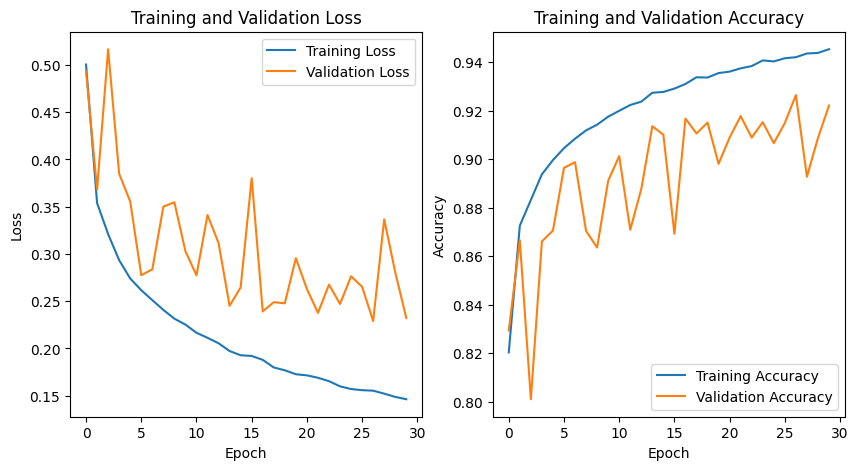

In [ ]:
results_virt(history)

In [ ]:
print("Evaluate Trail 4  Model")
model.evaluate(x_test_resized,y_test)

Evaluate Trail 4  Model
313/313 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9255


[0.22455771267414093, 0.9254999756813049]

313/313 [==============================] - 1s 2ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.94      0.91      0.93      5998
     Trouser       1.00      0.99      0.99      5996
    Pullover       0.94      0.93      0.93      5988
       Dress       0.94      0.97      0.95      5997
        Coat       0.93      0.92      0.92      5995
      Sandal       1.00      1.00      1.00      6000
       Shirt       0.85      0.89      0.87      5989
     Sneaker       0.99      0.98      0.99      5996
         Bag       1.00      0.99      1.00      6000
  Ankle boot       0.98      0.99      0.99      5998

    accuracy                           0.96     59957
   macro avg       0.96      0.96      0.96     59957
weighted avg       0.96      0.96      0.96     59957


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.89      0.85      0.87      1000
     Trouser 

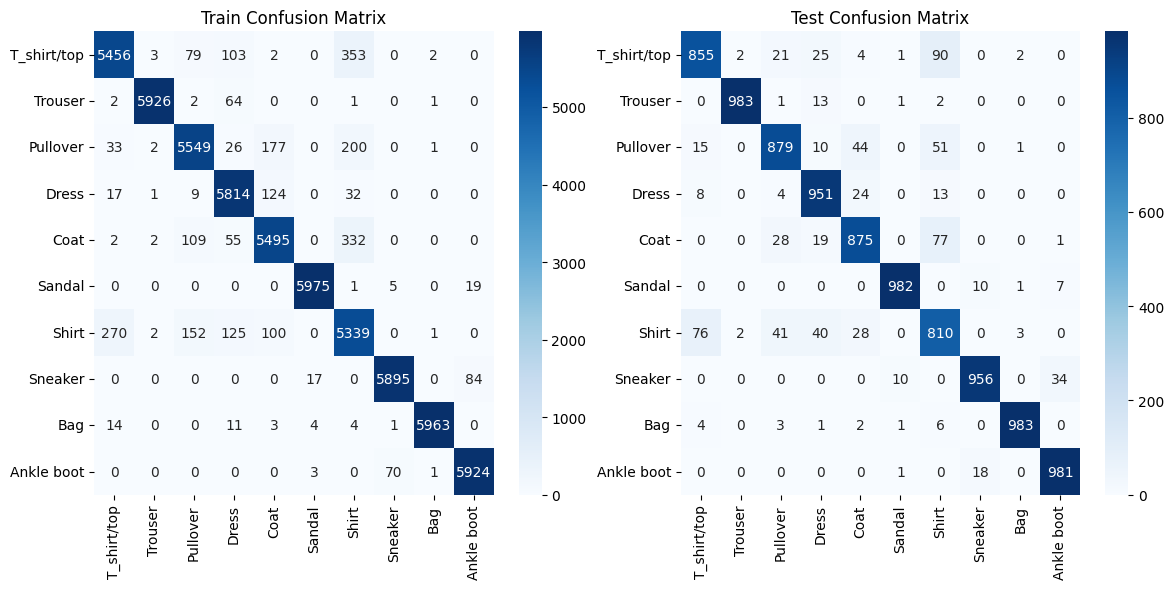

In [ ]:
predict_and_report(model, x_train_resized, y_train, x_test_resized, y_test, class_names)

as we can see the accuracy on the training data and validation data was about 93% and also the accuracy on the test increased to 92.5% also this can be seen from the confusion matrix of the test data as the number of shirt predicted as Tshirt/top decreased to 76 from 119 in the previous trail.

## Evaluate the model through cross validation:

using the model from the previous step

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define number of folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Initialize lists to store evaluation results
losses = []
accuracies = []
histories = []

# Perform stratified K-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(skf.split(x_train, y_train.argmax(axis=1)), 1):
  print(f"Fold {fold}")

  # Split data into training and validation sets for this fold
  x_train_fold, x_val_fold = x_train[train_indices], x_train[val_indices]
  y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

  # Reshape and resize data
  x_train_fold = resize(x_train_fold.reshape(-1, 28, 28, 1), (32, 32))
  x_val_fold = resize(x_val_fold.reshape(-1, 28, 28, 1), (32, 32))

  # Create a new model instance for each fold
  model = Enhanced_LeNet_5(num_kernels_1=32, num_kernels_2=64, num_kernels_3=128, num_nodes1=256, drop_ratio=0.3, batch_norm=True)

  history = model.fit(x_train_fold, y_train_fold, epochs=30,
                      batch_size=32,
                      validation_data=(x_val_fold, y_val_fold),
                      verbose=0)
  histories.append(history.history)

  val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
  print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
  losses.append(val_loss)
  accuracies.append(val_accuracy)
  del model

Fold 1
375/375 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.9148
Validation Loss: 0.2509525716304779, Validation Accuracy: 0.9147765040397644
Fold 2
375/375 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.9169
Validation Loss: 0.26221662759780884, Validation Accuracy: 0.9169446229934692
Fold 3
375/375 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9157
Validation Loss: 0.2508373260498047, Validation Accuracy: 0.9156867861747742
Fold 4
375/375 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8980
Validation Loss: 0.3095414936542511, Validation Accuracy: 0.8980068564414978
Fold 5
375/375 [==============================] - 1s 4ms/step - loss: 0.2479 - accuracy: 0.9218
Validation Loss: 0.24786058068275452, Validation Accuracy: 0.921774685382843


In [ ]:
# Calculate and print average validation loss and accuracy
avg_loss = np.mean(losses)
avg_accuracy = np.mean(accuracies)
print(f"Average Validation Loss: {round(avg_loss,2)}, Average Validation Accuracy: {round(avg_accuracy,2)}")
std_loss = np.std(losses)
std_accuracy = np.std(accuracies)
print(f"Standard deviation of Validation Loss: {round(std_loss,2)}, Standard deviation of Validation Accuracy: {round(std_accuracy,2)}")


Average Validation Loss: 0.26, Average Validation Accuracy: 0.91
Standard deviation of Validation Loss: 0.02, Standard deviation of Validation Accuracy: 0.01


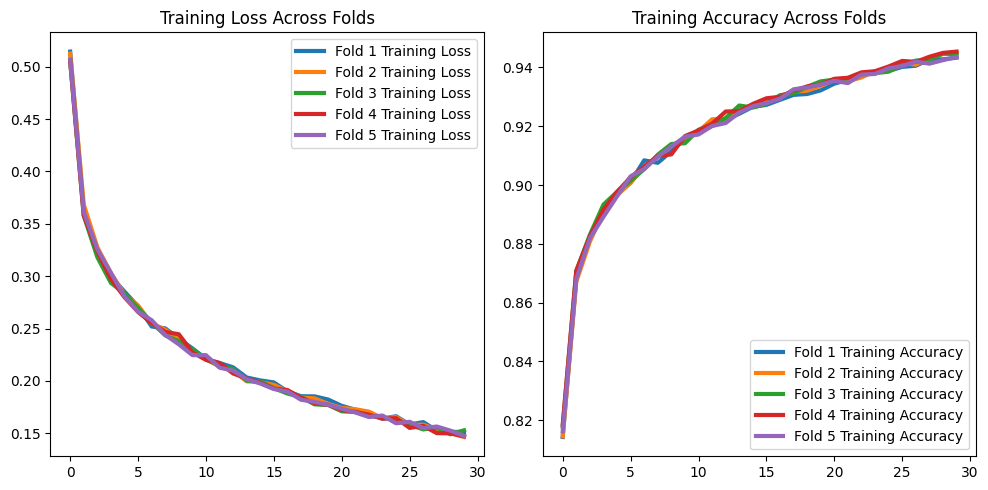

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create subplots

# Loss plot
number = 1
for history in histories:
  axes[0].plot(np.arange(0, 30), history["loss"], label=f"Fold {number} Training Loss", lw=3)
  number += 1

axes[0].legend()
axes[0].set_title('Training Loss Across Folds')  # Corrected title

# Accuracy plot
number = 1
for history in histories:
  axes[1].plot(np.arange(0, 30), history["accuracy"], label=f"Fold {number} Training Accuracy", lw=3)
  number += 1

axes[1].legend()
axes[1].set_title('Training Accuracy Across Folds')  # Corrected title

plt.tight_layout()
plt.show()

as we can see from the average and the standard deviation of the cross validation results we can accept this model.and also both the accuracy and loss curves for the fold are near to each other.

## Comment on why you think LeNet-5 further improves the accuracy if any at all.
- The leNet Architecture could achieve better performance on the Fashion-mnist dataset.
- as the accuracy on the test data was about 93% for the best trail, while in the FCNN it was about 86% on the test data.
- this is because of the:
  - Local Connectivity: CNNs use convolutional layers with learnable filters to act on specific areas of the picture. This enables them to record local details such as edges, textures, and basic forms.while FCNNs treat pictures as flattened vectors, which removes the spatial correlations between pixels. This may make it challenging for them to collect the critical elements required for proper picture categorization.
  - Parameter Efficiency: To link each neuron in one layer to every neuron in the next layer, FCNNs require a high number of parameters,CNNs, utilising local filters and weight sharing, drastically minimise the amount of parameters required.
  - Shared Weights: Convolutional filters are applied to the whole image, catching same characteristics regardless of location. This weight sharing decreases the amount of parameters and allows the network to learn features that are insensitive to tiny translations.

- in this project the Fcnn neural newtork could achieve a good performance as the data is simple after all the image size is 28X28 and in grayscale but when  there is classes close to each other as the T_shirt/top and Shirt the model couldn't catch the pattern to differentiate between them.

## Transfer learning :
in this step i will try different pretrained model i will start with vgg 19

In [ ]:
def handle_data(df,df2,target_size=(48,48)):

  # get the pixels data from both the training and testing dataframes
  x_train = df.iloc[:, 1:].values.reshape(-1,28,28,1)
  x_test = df2.iloc[:, 1:].values .reshape(-1,28,28,1)


  # since our data is gray scale i will repeat them 3 times to convert it to 3 channels
  x_train=np.dstack([x_train] * 3)
  x_test=np.dstack([x_test]*3)


  # reshape the data to be 3_D array
  x_train= x_train.reshape(-1, 28,28,3)
  x_test= x_test.reshape (-1,28,28,3)

  # resize the image to be accepted by the pre trained model
  x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize(target_size)) for im in x_train])
  x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize(target_size)) for im in x_test])

  # Normalization the training data

  x_train= x_train/ 255
  x_test = x_test / 255
  # handle the labels and use encoding
  y_train = df.iloc[:, 0].values
  y_test = df2.iloc[:, 0].values
  y_train=to_categorical(y_train,num_classes=10,dtype='float32')
  y_test=to_categorical(y_test,num_classes=10,dtype='float32')

  return x_train,x_test,y_train,y_test

In [ ]:
def VGG19_builder(num_classes=10,tune=False):

    base_model =  VGG19(weights= 'imagenet' , include_top=False, input_shape=(48, 48, 3))
    if tune==False:
          for layer in base_model.layers:
            layer.trainable = False
    else:
      for layer  in range(len(base_model.layers)-4):
        base_model.layers[layer].trainable = False
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)


    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



    return model


In [ ]:
# handle the image size
x_train,x_test,y_train,y_test=handle_data(df,df2,target_size=(48,48))

In [ ]:
print('The training data shape after handling it ',x_train.shape)
print('The testing data shape after handling it ',x_test.shape)
print('The training label data shape after handling it ',y_train.shape)
print('The testing label data shape after handling it ',y_test.shape)

The training data shape after handling it  (60000, 48, 48, 3)
The testing data shape after handling it  (10000, 48, 48, 3)
The training label data shape after handling it  (60000, 10)
The testing label data shape after handling it  (10000, 10)


In [ ]:
vgg19_model = VGG19_builder()
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
vgg_history = vgg19_model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 [==============================] - 26s 29ms/step - loss: 0.6273 - accuracy: 0.7775 - val_loss: 0.5154 - val_accuracy: 0.8138
Epoch 2/10
750/750 [==============================] - 20s 26ms/step - loss: 0.4846 - accuracy: 0.8229 - val_loss: 0.4687 - val_accuracy: 0.8305
Epoch 3/10
750/750 [==============================] - 20s 26ms/step - loss: 0.4437 - accuracy: 0.8372 - val_loss: 0.4656 - val_accuracy: 0.8269
Epoch 4/10
750/750 [==============================] - 21s 28ms/step - loss: 0.4205 - accuracy: 0.8451 - val_loss: 0.4344 - val_accuracy: 0.8415
Epoch 5/10
750/750 [==============================] - 20s 27ms/step - loss: 0.4032 - accuracy: 0.8509 - val_loss: 0.4528 - val_accuracy: 0.8360
Epoch 6/10
750/750 [==============================] - 20s 27ms/step - loss: 0.3903 - accuracy: 0.8562 - val_loss: 0.4259 - val_accuracy: 0.8455
Epoch 7/10
750/750 [==============================] - 22s 29ms/step - loss: 0.3750 - accuracy: 0.8605 - val_loss: 0.4348 - val_accuracy:

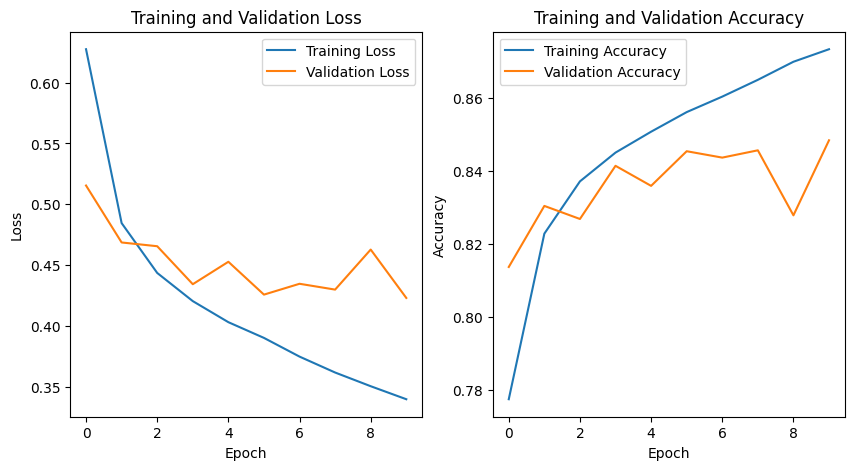

In [ ]:
results_virt(vgg_history)

313/313 [==============================] - 5s 16ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.83      0.83      0.83      6000
     Trouser       0.99      0.97      0.98      6000
    Pullover       0.77      0.84      0.80      6000
       Dress       0.87      0.83      0.85      6000
        Coat       0.73      0.85      0.79      6000
      Sandal       0.92      0.98      0.95      6000
       Shirt       0.77      0.61      0.68      6000
     Sneaker       0.92      0.95      0.94      6000
         Bag       0.97      0.98      0.98      6000
  Ankle boot       0.99      0.90      0.94      6000

    accuracy                           0.87     60000
   macro avg       0.88      0.87      0.87     60000
weighted avg       0.88      0.87      0.87     60000


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.79      0.80      0.80      1000
     Trouser

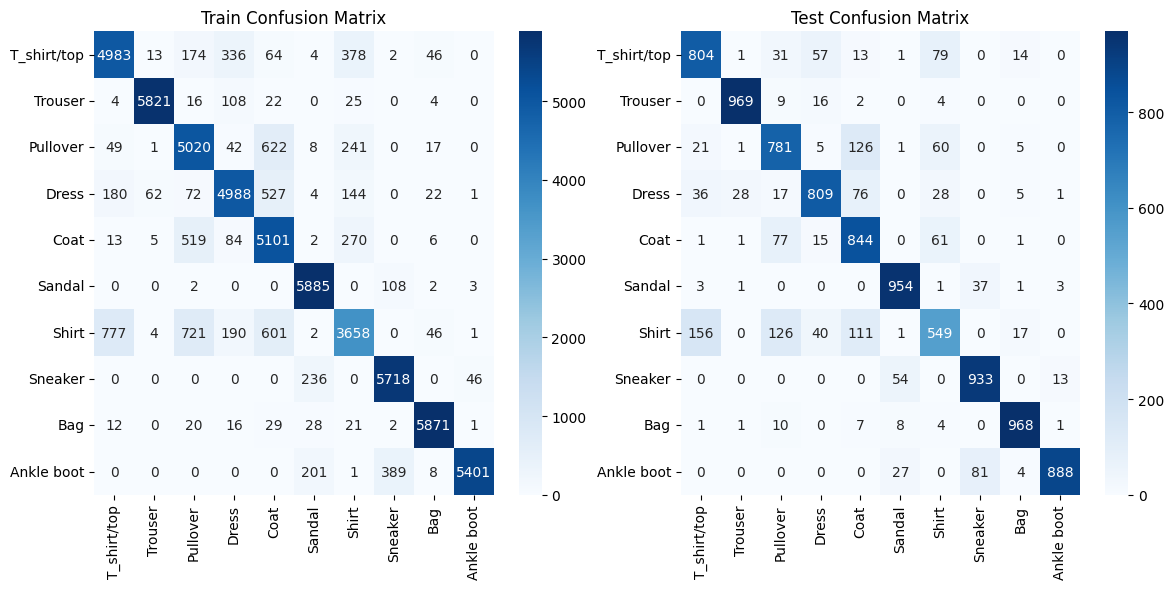

In [ ]:
predict_and_report(vgg19_model, x_train, y_train, x_test, y_test, class_names)

the results is worse than that of enhanced lenet 5 so i will unfreeze some layers and test it again.

In [ ]:
vgg19_model=VGG19_builder(num_classes=10,tune=True)
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
vgg_history = vgg19_model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
1500/1500 [==============================] - 43s 26ms/step - loss: 0.5833 - accuracy: 0.7907 - val_loss: 0.5281 - val_accuracy: 0.8227
Epoch 2/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.4225 - accuracy: 0.8485 - val_loss: 0.4300 - val_accuracy: 0.8397
Epoch 3/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3837 - accuracy: 0.8615 - val_loss: 0.3751 - val_accuracy: 0.8675
Epoch 4/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3556 - accuracy: 0.8745 - val_loss: 0.3698 - val_accuracy: 0.8701
Epoch 5/10
1500/1500 [==============================] - 38s 26ms/step - loss: 0.3304 - accuracy: 0.8819 - val_loss: 0.3535 - val_accuracy: 0.8730
Epoch 6/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3164 - accuracy: 0.8871 - val_loss: 0.3751 - val_accuracy: 0.8730
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.3047 - accuracy: 0.8898 - val_loss: 0.3693 -

In [ ]:
print("Evaluate VGG-19 Model")
vgg19_model.evaluate(x_test,y_test)

Evaluate VGG-19 Model
313/313 [==============================] - 6s 18ms/step - loss: 0.3266 - accuracy: 0.8853


[0.32664525508880615, 0.8852999806404114]

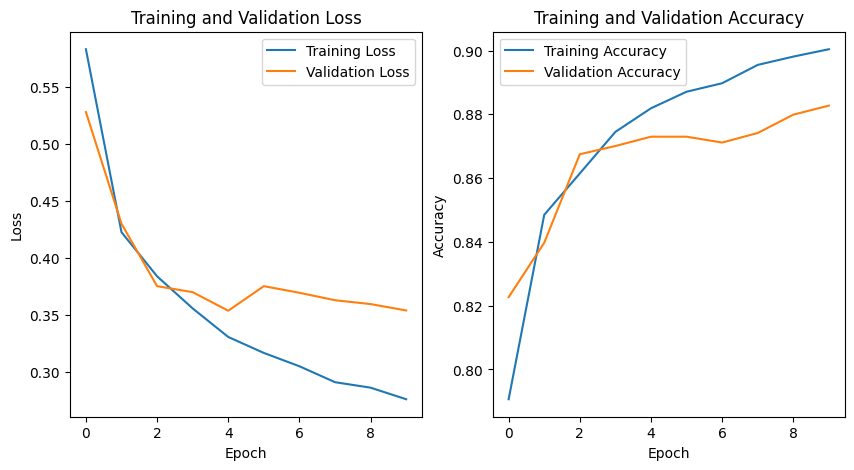

In [ ]:
results_virt(vgg_history)

313/313 [==============================] - 5s 14ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.92      0.80      0.85      6000
     Trouser       0.96      0.99      0.97      6000
    Pullover       0.82      0.87      0.84      6000
       Dress       0.89      0.91      0.90      6000
        Coat       0.82      0.86      0.84      6000
      Sandal       0.98      0.98      0.98      6000
       Shirt       0.77      0.74      0.75      6000
     Sneaker       0.94      0.99      0.96      6000
         Bag       0.98      0.99      0.99      6000
  Ankle boot       0.99      0.94      0.97      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.88      0.76      0.82      1000
     Trouser

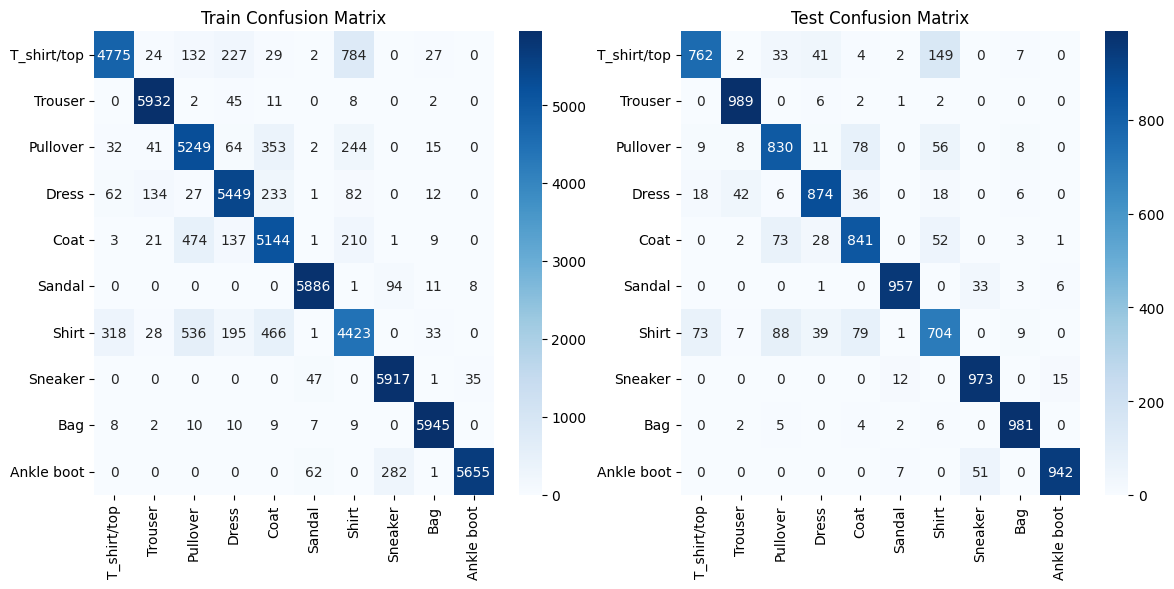

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predict_and_report(vgg19_model, x_train, y_train, x_test, y_test, class_names)

## Comment:
after unfeezing some layers in the convolution part of the vgg19 network this achieved better results than freezing the layers from learning as the accuracy increased from 85 on the test data to 89 on the test data,but the enhanced lenet-5 still the model with the highest performance till now, of course the vgg-19 model with unfreezing some layers may achieve higher accuracy if we train it for longer epochs but colab keep crashing due to the limitations on the resources.<br>
in the next trail i will try to use resnet 50

## tuning the ResNet50:
the input shape accepted by the resnet 50 is 32X32

In [ ]:
# handle the image size
x_train,x_test,y_train,y_test=handle_data(df,df2,target_size=(32,32))
print('The training data shape after handling it ',x_train.shape)
print('The testing data shape after handling it ',x_test.shape)
print('The training label data shape after handling it ',y_train.shape)
print('The testing label data shape after handling it ',y_test.shape)

The training data shape after handling it  (60000, 32, 32, 3)
The testing data shape after handling it  (10000, 32, 32, 3)
The training label data shape after handling it  (60000, 10)
The testing label data shape after handling it  (10000, 10)


In [ ]:
def Resnet50_builder(num_classes=10,tune=False):

    base_model = ResNet50(include_top=False, weights='imagenet',  input_shape=(32,32,3))
    if tune==False:
          for layer in base_model.layers:
            layer.trainable = False
    else:
      for layer  in range(len(base_model.layers)):
        base_model.layers[layer].trainable = True
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(512, activation='relu')(x)

    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)


    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



    return model


In [ ]:
resnet50_model = Resnet50_builder()
resnet50_model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
resnet50_history = resnet50_model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 [==============================] - 18s 17ms/step - loss: 0.9963 - accuracy: 0.6234 - val_loss: 0.8163 - val_accuracy: 0.6952
Epoch 2/10
750/750 [==============================] - 11s 14ms/step - loss: 0.7894 - accuracy: 0.6998 - val_loss: 0.8105 - val_accuracy: 0.6960
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.7367 - accuracy: 0.7208 - val_loss: 0.7067 - val_accuracy: 0.7395
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.7116 - accuracy: 0.7316 - val_loss: 0.6961 - val_accuracy: 0.7383
Epoch 5/10
750/750 [==============================] - 12s 15ms/step - loss: 0.6856 - accuracy: 0.7409 - val_loss: 0.6664 - val_accuracy: 0.7419
Epoch 6/10
750/750 [==============================] - 12s 16ms/step - loss: 0.6746 - accuracy: 0.7474 - val_loss: 0.6687 - val_accuracy: 0.7474
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.6505 - accuracy: 0.7524 - val_loss: 0.6404 - val_accuracy:

In [ ]:
print("Evaluate ResNet 50 Model")
resnet50_model.evaluate(x_test,y_test)

Evaluate ResNet 50 Model
313/313 [==============================] - 7s 24ms/step - loss: 0.6220 - accuracy: 0.7733


[0.6220117211341858, 0.7732999920845032]

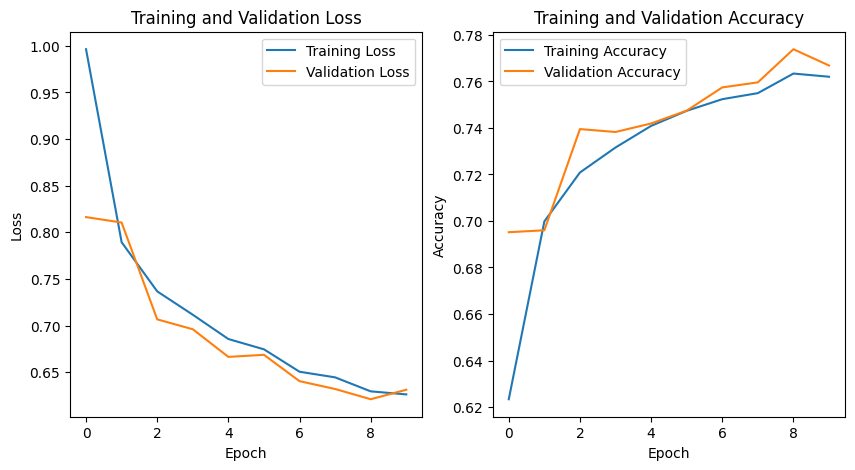

In [ ]:
results_virt(resnet50_history)

313/313 [==============================] - 4s 9ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.74      0.69      0.71      6000
     Trouser       0.95      0.91      0.93      6000
    Pullover       0.70      0.55      0.61      6000
       Dress       0.77      0.77      0.77      6000
        Coat       0.64      0.75      0.69      6000
      Sandal       0.88      0.88      0.88      6000
       Shirt       0.44      0.50      0.47      6000
     Sneaker       0.92      0.74      0.82      6000
         Bag       0.91      0.93      0.92      6000
  Ankle boot       0.83      0.97      0.89      6000

    accuracy                           0.77     60000
   macro avg       0.78      0.77      0.77     60000
weighted avg       0.78      0.77      0.77     60000


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.72      0.69      0.70      1000
     Trouser 

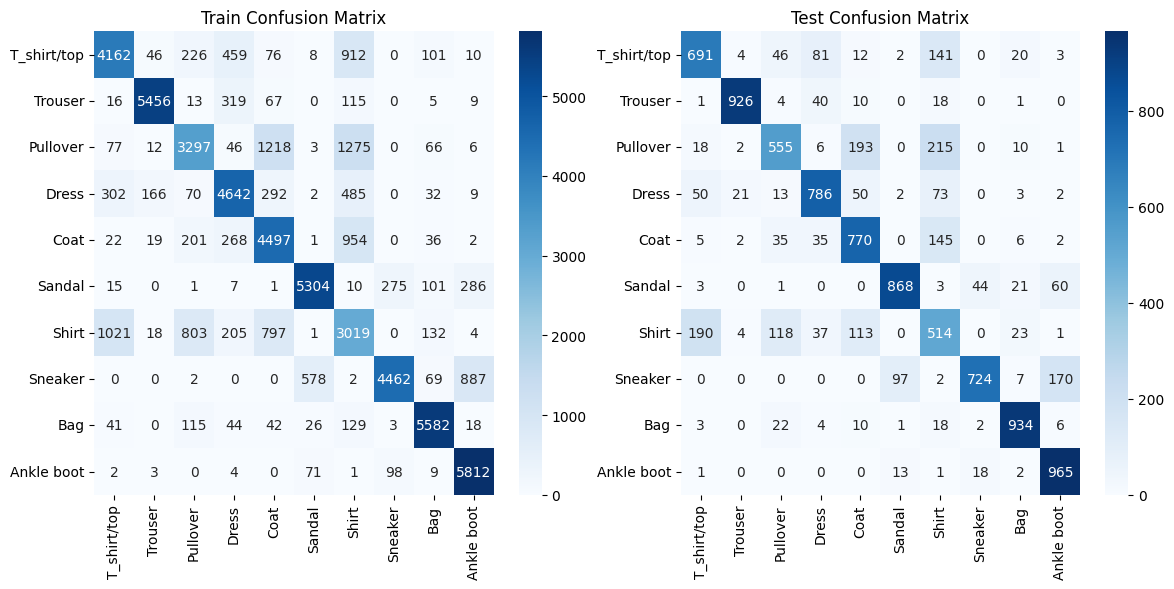

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predict_and_report(resnet50_model, x_train, y_train, x_test, y_test, class_names)

the resnet model give poor accuracy on both the training and testing data so i will unfreeze the layers and evaluate it again.

In [ ]:
resnet50_model = Resnet50_builder(tune=True)
resnet50_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
resnet50_history = resnet50_model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 [==============================] - 75s 52ms/step - loss: 0.6194 - accuracy: 0.7947 - val_loss: 3.3599 - val_accuracy: 0.1420
Epoch 2/10
750/750 [==============================] - 39s 52ms/step - loss: 0.4869 - accuracy: 0.8240 - val_loss: 0.4508 - val_accuracy: 0.8510
Epoch 3/10
750/750 [==============================] - 38s 51ms/step - loss: 0.3886 - accuracy: 0.8611 - val_loss: 0.4174 - val_accuracy: 0.8470
Epoch 4/10
750/750 [==============================] - 38s 51ms/step - loss: 0.3676 - accuracy: 0.8668 - val_loss: 0.6381 - val_accuracy: 0.7941
Epoch 5/10
750/750 [==============================] - 39s 51ms/step - loss: 0.3743 - accuracy: 0.8690 - val_loss: 0.4417 - val_accuracy: 0.8468
Epoch 6/10
750/750 [==============================] - 38s 50ms/step - loss: 0.3319 - accuracy: 0.8809 - val_loss: 0.3068 - val_accuracy: 0.8893
Epoch 7/10
750/750 [==============================] - 44s 58ms/step - loss: 0.3205 - accuracy: 0.8883 - val_loss: 0.3267 - val_accuracy:

In [ ]:
print("Evaluate ResNet 50 Model")
resnet50_model.evaluate(x_test,y_test)

Evaluate ResNet 50 Model
313/313 [==============================] - 3s 11ms/step - loss: 0.2969 - accuracy: 0.8928


[0.29694896936416626, 0.892799973487854]

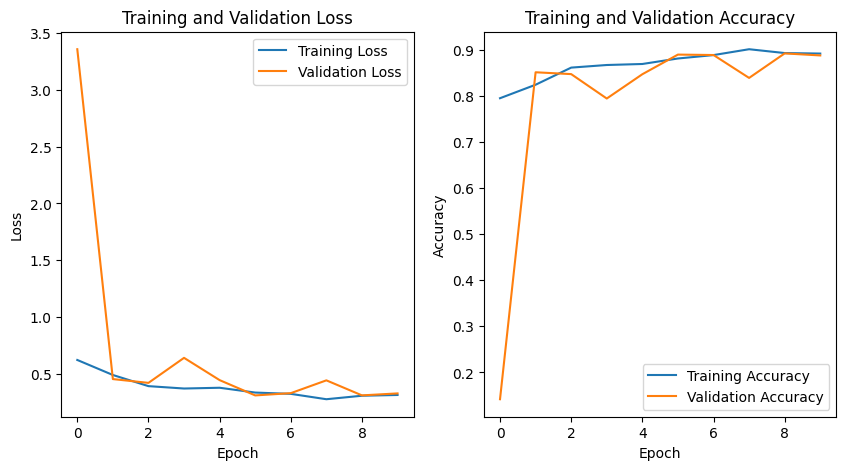

In [ ]:
results_virt(resnet50_history)

313/313 [==============================] - 5s 10ms/step
**Train Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.83      0.88      0.86      6000
     Trouser       0.99      0.97      0.98      6000
    Pullover       0.81      0.84      0.83      6000
       Dress       0.89      0.93      0.91      6000
        Coat       0.81      0.85      0.83      6000
      Sandal       0.97      0.99      0.98      6000
       Shirt       0.80      0.66      0.72      6000
     Sneaker       0.95      0.97      0.96      6000
         Bag       0.98      0.98      0.98      6000
  Ankle boot       0.98      0.94      0.96      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000


**Test Classification Report**
              precision    recall  f1-score   support

 T_shirt/top       0.80      0.87      0.83      1000
     Trouser

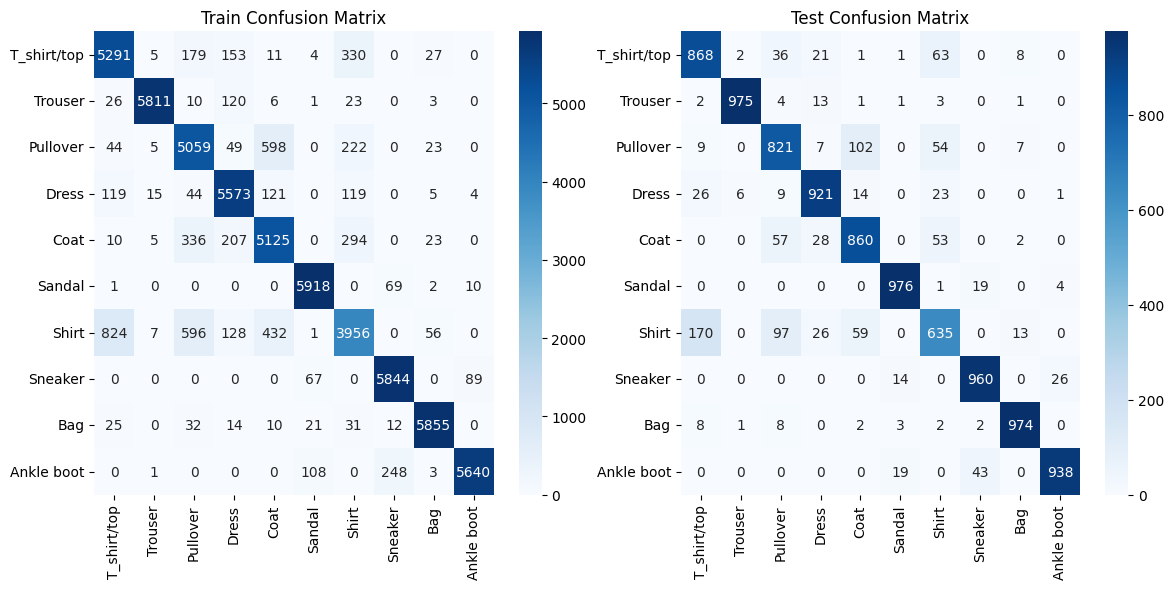

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predict_and_report(resnet50_model, x_train, y_train, x_test, y_test, class_names)

# comment on Resnet:
After unfreezing the layers the accuracy increase to 89 % from 77% in only 10 epochs, increasing the number of epochs may achieve better results.